# Connect google drive to this VM


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


# Read our data file on the British seatbelt study



In [ ]:
import pandas as pd

df = pd.read_csv("/content/gdrive/MyDrive/PGSS2021/L2-792021/britishSeatBeltStudy.csv")
df.head()

,DriversKilled,drivers,front,rear,kms,PetrolPrice,VanKilled,law,Date
0,107,1687,867,269,9059,0.102972,12,0,1969-01-01
1,97,1508,825,265,7685,0.102363,6,0,1969-02-01
2,102,1507,806,319,9963,0.102062,12,0,1969-03-01
3,87,1385,814,407,10955,0.100873,8,0,1969-04-01
4,119,1632,991,454,11823,0.101020,10,0,1969-05-01


# Adjust the column types here and check the data frame for information on column-specific types

In [ ]:
df["law"] = df["law"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   DriversKilled  192 non-null    int64   
 1   drivers        192 non-null    int64   
 2   front          192 non-null    int64   
 3   rear           192 non-null    int64   
 4   kms            192 non-null    int64   
 5   PetrolPrice    192 non-null    float64 
 6   VanKilled      192 non-null    int64   
 7   law            192 non-null    category
 8   Date           192 non-null    object  
dtypes: category(1), float64(1), int64(6), object(1)
memory usage: 12.4+ KB


# Load SKLearn's linear model for logistic regression and fit it against our dataset, identifying a separate variable, X for regressors, and y for the response variable (binary in this case)

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics

X=df[['DriversKilled', 'VanKilled']]  # Features
y=df['law'].astype('category')  # Labels

myModel = LogisticRegression()
myModel.fit(X,y)


0

# Evaluate the fitted model on some test examples

In [ ]:
y_pred = myModel.predict([[100, 10]])[0]
print("input: " + "[100, 10]")
print("output: " + str(y_pred))

y_pred = myModel.predict([[10, 1]])[0]
print("input: " + "[10, 1]")
print("output: " + str(y_pred))

input: [100, 10]
output: 0
input: [10, 1]
output: 1


# Test the model's ability to predict a bunch of records at once, by passing in our initial training matrix, X, into the model.  Then prepare a Confusion Matrix to compare prediction counts against actual counts for each class of law=1 or law=0

In [ ]:
y_pred = myModel.predict(X)
pd.crosstab(y, y_pred)

col_0,0,1
law,,
0,166,3
1,16,7


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix_0 = confusion_matrix (y, y_pred)
confusion_matrix_0

array([[166,   3],
       [ 16,   7]])

# Lets create some statistics around the group / batch prediction accuracies using the default threshold for probability of law=1 (which is 0.5 by default)

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y, y_pred)

print(cr)

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       169
           1       0.70      0.30      0.42        23

    accuracy                           0.90       192
   macro avg       0.81      0.64      0.69       192
weighted avg       0.89      0.90      0.88       192



# Optimize the model-specific probability threshold to improve the model prediction stats

In [ ]:
# Fine tune the model with a better probability cut-off to get better results in the training set

from sklearn.metrics import classification_report
y_pred = myModel.predict_proba(X)[:,1]

cr = classification_report(y, y_pred>0.15)
print(confusion_matrix (y, y_pred>0.15))
print(cr)

[[137  32]
 [  5  18]]
              precision    recall  f1-score   support

           0       0.96      0.81      0.88       169
           1       0.36      0.78      0.49        23

    accuracy                           0.81       192
   macro avg       0.66      0.80      0.69       192
weighted avg       0.89      0.81      0.83       192



In [ ]:
# Fine tune the model with a better probability cut-off to get better results in the training set [This time lets optimize using the log odds]

from sklearn.metrics import classification_report
y_pred = myModel.predict_log_proba(X)[:,1]

cr = classification_report(y, y_pred>-2)
print(confusion_matrix (y, y_pred>-2))
print(cr)

[[135  34]
 [  5  18]]
              precision    recall  f1-score   support

           0       0.96      0.80      0.87       169
           1       0.35      0.78      0.48        23

    accuracy                           0.80       192
   macro avg       0.66      0.79      0.68       192
weighted avg       0.89      0.80      0.83       192



# Let's save the model that we prepared above, myModel, to a neutral binary file that can live and operate by itself

In [ ]:
import pickle
model_filename = 'british-Seatbelt-Study-model.pkl'
pickle.dump(myModel, open(model_filename,'wb'))


In [ ]:
reloadedModel = pickle.load(open('british-Seatbelt-Study-model.pkl','rb'))
print(reloadedModel.predict([[100, 10]]))

[0]


In [ ]:
print(reloadedModel.predict([[10, 1]]))

[1]


# Evaluate a set of models - not just logistic regression - for the classification ability of law=1 v/s law=0, starting with a PORTION of the data for fitting only, but a different portion each time, many times in a row, to see if our model has truly learned something valuable


>LogisticRegression: ideal=0.901, cv=0.896
>RidgeClassifier: ideal=0.880, cv=0.881
>SGDClassifier: ideal=0.781, cv=0.796
>PassiveAggressiveClassifier: ideal=0.802, cv=0.881
>KNeighborsClassifier: ideal=0.906, cv=0.911
>DecisionTreeClassifier: ideal=0.839, cv=0.849
>ExtraTreeClassifier: ideal=0.859, cv=0.864
>LinearSVC: ideal=0.719, cv=0.796
>SVC: ideal=0.880, cv=0.881
>GaussianNB: ideal=0.891, cv=0.890
>AdaBoostClassifier: ideal=0.896, cv=0.875
>BaggingClassifier: ideal=0.870, cv=0.859
>RandomForestClassifier: ideal=0.870, cv=0.880
>ExtraTreesClassifier: ideal=0.870, cv=0.881
>GaussianProcessClassifier: ideal=0.859, cv=0.854
>GradientBoostingClassifier: ideal=0.865, cv=0.859
>LinearDiscriminantAnalysis: ideal=0.901, cv=0.901
>QuadraticDiscriminantAnalysis: ideal=0.891, cv=0.870
Correlation: 0.854


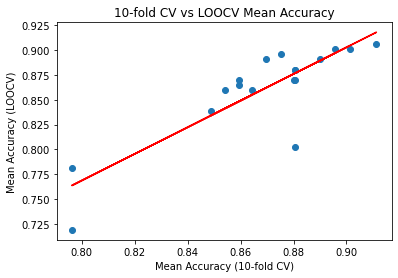

In [25]:
# correlation between test harness and ideal test condition
from numpy import mean
from numpy import isnan
from numpy import asarray
from numpy import polyfit
from scipy.stats import pearsonr
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
 
# create the dataset
def get_dataset(n_samples=100):
    # X, y = make_classification(n_samples=n_samples, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    
    X=df[['DriversKilled', 'VanKilled']]  # Features
    y=df['law'].astype('category')  # Labels
    
    return X, y
 
# get a list of models to evaluate
def get_models():
    models = list()
    models.append(LogisticRegression())
    models.append(RidgeClassifier())
    models.append(SGDClassifier())
    models.append(PassiveAggressiveClassifier())
    models.append(KNeighborsClassifier())
    models.append(DecisionTreeClassifier())
    models.append(ExtraTreeClassifier())
    models.append(LinearSVC())
    models.append(SVC())
    models.append(GaussianNB())
    models.append(AdaBoostClassifier())
    models.append(BaggingClassifier())
    models.append(RandomForestClassifier())
    models.append(ExtraTreesClassifier())
    models.append(GaussianProcessClassifier())
    models.append(GradientBoostingClassifier())
    models.append(LinearDiscriminantAnalysis())
    models.append(QuadraticDiscriminantAnalysis())
    return models
 
# evaluate the model using a given test condition
def evaluate_model(cv, model):
    # get the dataset
    X, y = get_dataset()
    # evaluate the model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # return scores
    return mean(scores)
 
# define test conditions
ideal_cv = LeaveOneOut()
cv = KFold(n_splits=10, shuffle=True, random_state=1)
# get the list of models to consider
models = get_models()
# collect results
ideal_results, cv_results = list(), list()
# evaluate each model
for model in models:
    # evaluate model using each test condition
    cv_mean = evaluate_model(cv, model)
    ideal_mean = evaluate_model(ideal_cv, model)
    # check for invalid results
    if isnan(cv_mean) or isnan(ideal_mean):
        continue
    # store results
    cv_results.append(cv_mean)
    ideal_results.append(ideal_mean)
    # summarize progress
    print('>%s: ideal=%.3f, cv=%.3f' % (type(model).__name__, ideal_mean, cv_mean))


# calculate the correlation between each test condition
corr, _ = pearsonr(cv_results, ideal_results)
print('Correlation: %.3f' % corr)
# scatter plot of results
pyplot.scatter(cv_results, ideal_results)
# plot the line of best fit
coeff, bias = polyfit(cv_results, ideal_results, 1)
line = coeff * asarray(cv_results) + bias
pyplot.plot(cv_results, line, color='r')
# label the plot
pyplot.title('10-fold CV vs LOOCV Mean Accuracy')
pyplot.xlabel('Mean Accuracy (10-fold CV)')
pyplot.ylabel('Mean Accuracy (LOOCV)')
# show the plot
pyplot.show()

In [22]:
X1, y1 = get_dataset()

In [23]:
X1

array([[ 4.04836854e+00, -2.67724481e+00,  2.11332947e+00, ...,
         8.17524462e-01, -3.15597168e+00,  4.33604140e+00],
       [ 1.15682898e+00,  7.52943571e-01, -1.03038727e+01, ...,
         1.19066787e+00,  1.58240699e+01,  5.22029877e+00],
       [-4.95770878e-01,  7.74616621e+00, -1.01731011e+01, ...,
         3.78330001e+00,  1.05086732e+01,  1.16407444e+01],
       ...,
       [-6.31409629e-01, -4.20494222e-01, -1.74791921e+00, ...,
        -3.01213690e+00, -5.59288278e+00,  6.03116404e+00],
       [-2.72940069e+00, -1.30634521e+00,  4.19694132e+00, ...,
        -2.32566114e+00,  3.52498671e+00, -7.00451448e+00],
       [-4.38521322e-01,  7.44788426e-03,  1.97486928e-01, ...,
        -2.53455664e+00, -7.42659183e-01,  2.32133225e+00]])

In [24]:
y1

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1])

# Create NGROK web server


In [26]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip


--2021-07-13 21:10:05--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 3.231.85.157, 3.227.65.201, 3.208.246.187, ...
Connecting to bin.equinox.io (bin.equinox.io)|3.231.85.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  16.2MB/s    in 0.8s    

2021-07-13 21:10:07 (16.2 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [65]:
get_ipython().system_raw('./ngrok http 8501 &')


In [66]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'


Execute the next cell and the go to the following URL: https://32f208c224c2.ngrok.io


In [64]:
%%writefile streamlitApp.py

import streamlit as st

import pickle

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import base64
import pathlib


def main():
    page = st.sidebar.selectbox("Model Builder", [ "Test", "Train"])
    DriversKilled = st.sidebar.text_area("Enter the number of people who died this month: ", 100)
    VanKilled = st.sidebar.text_area("Enter the number of people who died driving Vans this month: ", 10)
        
    if page == "Test":
        st.header("Predicted Status of Seatbelt Law (0 or 1): ")

        reloadedModel = pickle.load(open('/content/british-Seatbelt-Study-model.pkl','rb'))
        result = reloadedModel.predict([[float(DriversKilled), float(VanKilled)]])

        st.write(result)

    elif page == "Train":
        st.header("Refit the model against new data: ")

# @st.cache
# @st.cache(allow_output_mutation=True)
# @st.cache(suppress_st_warning=True)


if __name__ == "__main__":
    main()


Overwriting streamlitApp.py


In [60]:
# ! pip install streamlit

In [67]:
!streamlit run /content/streamlitApp.py 


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.227.150.46:8501

  Stopping...
  Stopping...
